In [60]:
import tensorflow as tf
import tensorflow.keras
import numpy as np
import cv2
import os
import pickle
import matplotlib.pyplot as plt

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Input

class_model = Sequential()
class_model.add(Input(shape = (512, 512, 1)))
class_model.add(Conv2D(64, (5,5), padding = "same"))
class_model.add(Activation("relu"))
class_model.add(MaxPooling2D(pool_size=(2,2)))

class_model.add(Dropout(0.2))

class_model.add(Conv2D(64, (5,5), padding = "same"))
class_model.add(Activation("relu"))
class_model.add(MaxPooling2D(pool_size=(2,2)))

class_model.add(Conv2D(64, (5,5), padding = "same"))
class_model.add(Activation("relu"))
class_model.add(MaxPooling2D(pool_size=(2,2)))

class_model.add(Flatten())
class_model.add(Dense(64, activation="LeakyReLU"))

class_model.add(Dropout(0.2))

class_model.add(Dense(64, activation="LeakyReLU"))

class_model.add(Dense(7, activation="softmax"))

#fitongenerator

In [62]:
with open("models/class_weights.pickle","rb") as file:
    blah = pickle.load(file)

In [63]:
class_model.set_weights(blah)

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Input

btissue_model = Sequential()
btissue_model.add(Input(shape = (512, 512, 1)))
btissue_model.add(Conv2D(64, (5,5), padding = "same"))
btissue_model.add(Activation("relu"))
btissue_model.add(MaxPooling2D(pool_size=(2,2)))

btissue_model.add(Dropout(0.2))

btissue_model.add(Conv2D(64, (5,5), padding = "same"))
btissue_model.add(Activation("relu"))
btissue_model.add(MaxPooling2D(pool_size=(2,2)))

btissue_model.add(Conv2D(64, (5,5), padding = "same"))
btissue_model.add(Activation("relu"))
btissue_model.add(MaxPooling2D(pool_size=(2,2)))

btissue_model.add(Flatten())
btissue_model.add(Dense(64, activation="LeakyReLU"))

btissue_model.add(Dropout(0.2))

btissue_model.add(Dense(64, activation="LeakyReLU"))

btissue_model.add(Dense(3, activation="softmax"))
#fitongenerator

In [65]:
with open("models/btissue_weights.pickle","rb") as file:
    blah = pickle.load(file)

In [66]:
btissue_model.set_weights(blah)

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Input

severity_model = Sequential()
severity_model.add(Input(shape = (512, 512, 1)))
severity_model.add(Conv2D(64, (5,5), padding = "same"))
severity_model.add(Activation("relu"))
severity_model.add(MaxPooling2D(pool_size=(2,2)))

severity_model.add(Dropout(0.2))

severity_model.add(Conv2D(64, (5,5), padding = "same"))
severity_model.add(Activation("relu"))
severity_model.add(MaxPooling2D(pool_size=(2,2)))

severity_model.add(Conv2D(64, (5,5), padding = "same"))
severity_model.add(Activation("relu"))
severity_model.add(MaxPooling2D(pool_size=(2,2)))

severity_model.add(Flatten())
severity_model.add(Dense(64, activation="LeakyReLU"))

severity_model.add(Dropout(0.2))

severity_model.add(Dense(64, activation="LeakyReLU"))

severity_model.add(Dense(1, activation="sigmoid"))
#fitongenerator

In [68]:
with open("models/severity_weights.pickle","rb") as file:
    blah = pickle.load(file)

In [69]:
severity_model.set_weights(blah)

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Input

circle_model = Sequential()
circle_model.add(Input(shape = (512, 512, 1)))
circle_model.add(Conv2D(64, (5,5), padding = "same"))
circle_model.add(Activation("relu"))
circle_model.add(MaxPooling2D(pool_size=(2,2)))

circle_model.add(Dropout(0.2))

circle_model.add(Conv2D(64, (5,5), padding = "same"))
circle_model.add(Activation("relu"))
circle_model.add(MaxPooling2D(pool_size=(2,2)))

circle_model.add(Conv2D(64, (5,5), padding = "same"))
circle_model.add(Activation("relu"))
circle_model.add(MaxPooling2D(pool_size=(2,2)))

circle_model.add(Flatten())
circle_model.add(Dense(64, activation="LeakyReLU"))

circle_model.add(Dropout(0.2))

circle_model.add(Dense(64, activation="LeakyReLU"))

circle_model.add(Dense(3))

In [71]:
with open("models/crc.pickle","rb") as file:
    blah = pickle.load(file)

In [72]:
circle_model.set_weights(blah)

In [73]:
img = cv2.imread("imgpng/mdb012.png",cv2.IMREAD_GRAYSCALE)
image = np.array(cv2.resize(img,(512,512)))/255.0

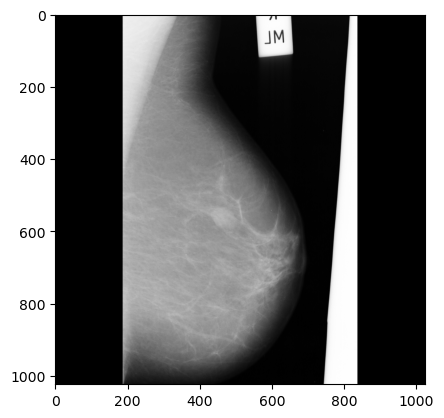

In [74]:
plt.imshow(img, cmap="gray")

In [75]:
# cv2.imshow("image",img)

In [76]:
image = np.reshape(image,(1,512,512,1))

In [77]:
y_pred = class_model.predict(image)

1/1 [==============================] - 0s 224ms/step


In [78]:
y_pred

array([[8.4635691e-26, 2.9417181e-32, 3.5104540e-37, 1.0000000e+00,
        3.5270249e-33, 4.6793987e-33, 6.0968965e-33]], dtype=float32)

In [79]:
abno = np.argmax(y_pred)

In [80]:
classes = ["ARCH","ASYM","CALC","CIRC","MISC","NORM","SPIC"]
btissue_class = ["D","F","G"]
severity_class = ["Benign","Malignant"]

In [81]:
print(f"Abnormality type is {classes[abno]}")

Abnormality type is CIRC


In [82]:
pred = btissue_model.predict(image)

1/1 [==============================] - 0s 214ms/step


In [83]:
bt = np.argmax(pred)

In [84]:
print(f"background tissue character is {btissue_class[bt]}")

background tissue character is F


In [85]:
if not abno == 5:
    predi = severity_model.predict(image)
    sev = np.round(predi)
    print(f"Severity type is {severity_class[int(sev)]}")

1/1 [==============================] - 0s 242ms/step
Severity type is Benign


1/1 [==============================] - 0s 280ms/step
[[525.40594  411.29462   23.570591]]


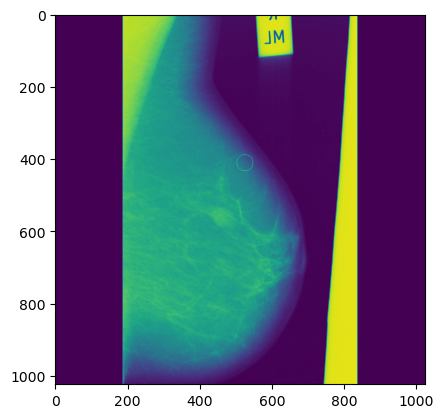

In [86]:
if not abno == 5:
    predi2 = circle_model.predict(image)
    predi2 = predi2*1024
    print(predi2)
    x_coord = int(predi2[0][0])
    y_coord = int(predi2[0][1])
    radius = int(predi2[0][2])
    imggg = cv2.circle(img,(x_coord,y_coord),radius,(255,0,0),1)
    plt.imshow(imggg)

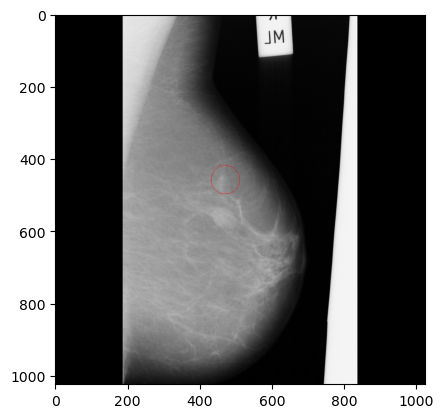

In [87]:
img2 = cv2.imread("imgpng/mdb012.png")
imagggg = cv2.circle(img2,(471,458),40,(255,0,0),1)
plt.imshow(imagggg)